# <font color=darkblue> Machine Learning model deployment with Flask framework on Heroku</font>

## <font color=Blue>Used Cars Price Prediction Application</font>

### Objective:
1. To build a Machine learning regression model to predict the selling price of the used cars based on the different input features like fuel_type, kms_driven, type of transmission etc.
2. Deploy the machine learning model with flask framework on heroku.

### Dataset Information:
#### Dataset Source: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv
This dataset contains information about used cars listed on www.cardekho.com
- **Car_Name**: Name of the car
- **Year**: Year of Purchase
- **Selling Price (target)**: Selling price of the car in lakhs
- **Present Price**: Present price of the car in lakhs
- **Kms_Driven**: kilometers driven
- **Fuel_Type**: Petrol/diesel/CNG
- **Seller_Type**: Dealer or Indiviual
- **Transmission**: Manual or Automatic
- **Owner**: first, second or third owner


### 1. Import required libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics

### 2. Load the dataset

In [2]:
df = pd.read_csv('car+data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### 3. Check the shape and basic information of the dataset.

In [3]:
df.shape

(301, 9)

### 4. Check for the presence of the duplicate records in the dataset? If present drop them

In [4]:
len(df[df.duplicated()])

2

In [5]:
## dropping duplicate records
df.drop_duplicates(inplace=True)

In [6]:
## recheck id the duplicates are dropped or not
len(df[df.duplicated()])

0

### 5. Drop the columns which you think redundant for the analysis.

In [7]:
df=df.drop(columns=(["Car_Name"]),axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           299 non-null    int64  
 1   Selling_Price  299 non-null    float64
 2   Present_Price  299 non-null    float64
 3   Kms_Driven     299 non-null    int64  
 4   Fuel_Type      299 non-null    object 
 5   Seller_Type    299 non-null    object 
 6   Transmission   299 non-null    object 
 7   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 21.0+ KB


In [8]:
miss_val_per=df.isnull().sum()*100/len(df)
print(miss_val_per)

Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64


### 6. Extract a new feature called 'age_of_the_car' from the feature 'year' and drop the feature year

In [9]:
from datetime import date
df['age_of_the_car']=date.today().year - df['Year']
df[['Year','age_of_the_car']].head()

,Year,age_of_the_car
0,2014,8
1,2013,9
2,2017,5
3,2011,11
4,2014,8


In [10]:
df=df.drop("Year",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Selling_Price   299 non-null    float64
 1   Present_Price   299 non-null    float64
 2   Kms_Driven      299 non-null    int64  
 3   Fuel_Type       299 non-null    object 
 4   Seller_Type     299 non-null    object 
 5   Transmission    299 non-null    object 
 6   Owner           299 non-null    int64  
 7   age_of_the_car  299 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 21.0+ KB


### 7. Encode the categorical columns

In [11]:
#label Encoding
cat=['Fuel_Type','Seller_Type','Transmission']

lbl=LabelEncoder()
for i in cat:
    df[i]=df[[i]].apply(lbl.fit_transform)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_the_car
0,3.35,5.59,27000,2,0,1,0,8
1,4.75,9.54,43000,1,0,1,0,9
2,7.25,9.85,6900,2,0,1,0,5
3,2.85,4.15,5200,2,0,1,0,11
4,4.60,6.87,42450,1,0,1,0,8


In [12]:
#one-hot encode the data using pandas get_dummies
features=pd.get_dummies(df)
#display the first 5 rows of the last 12 columns
features.iloc[:,:].head(6)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_the_car
0,3.35,5.59,27000,2,0,1,0,8
1,4.75,9.54,43000,1,0,1,0,9
2,7.25,9.85,6900,2,0,1,0,5
3,2.85,4.15,5200,2,0,1,0,11
4,4.60,6.87,42450,1,0,1,0,8
5,9.25,9.83,2071,1,0,1,0,4


In [13]:
#labels are the values we want to predict
label=np.array(features['Present_Price'])
#remove the labels from  the features
#axis 1 refers to the columns
features_list=list(features.columns)
features=np.array(features)

### 8. Separate the target and independent features.

In [28]:
## separate target and independent variables
X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

### 9. Split the data into train and test.

In [15]:
x_data=df[['Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','age_of_the_car']]
y_data=df['Selling_Price']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2)

In [17]:
train_features,test_features,train_label,test_label=train_test_split(features,label,test_size=0.25,random_state=42)
print(train_features.shape)
print(train_label.shape)
print(test_features.shape)
print(test_label.shape)

(224, 8)
(224,)
(75, 8)
(75,)


In [20]:
#baseline prediction
baseline=test_features[:,features_list.index('Selling_Price')]
#baseline error
baseline_err=abs(baseline-test_label)
print('Average baseline error:',round(np.mean(baseline_err),2))

Average baseline error: 3.22


In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(209, 7) (90, 7)
(209,) (90,)


### 10. Build a Random forest Regressor model and check the r2-score for train and test.

In [33]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('r2 score: ',metrics.r2_score(y_test, y_pred)*100)
print('mean squared log error: ',metrics.mean_squared_log_error(y_test, y_pred)*100)

r2 score:  89.59041493584967
mean squared log error:  2.485859663563658


<AxesSubplot:xlabel='Selling_Price'>

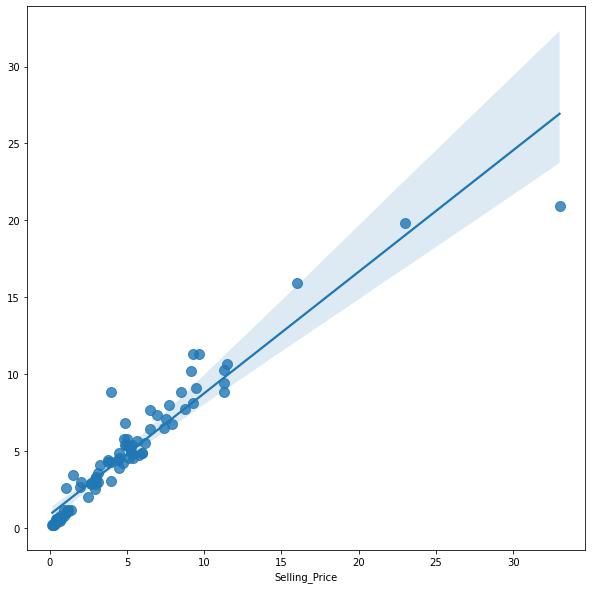

In [34]:
plt.figure(figsize=(10,10))
sns.regplot(y_test, y_pred, fit_reg=True, scatter_kws={"s": 100})

In [36]:
rf=RandomForestRegressor(n_estimators=1000,random_state=42)
rf.fit(train_features,train_label);

In [22]:
predictions=rf.predict(test_features)
errors=abs(predictions-test_label)
print('mean absolute error',round(np.mean(errors),2),'degrees')

mean absolute error 0.34 degrees


In [23]:
mape=100*(errors/test_label)
accuracy=100-np.mean(mape)
print('Accuracy',round(accuracy,2),'%')

Accuracy 97.26 %


### 11. Create a pickle file with an extension as .pkl

In [24]:
import pickle
#saving model to disk
pickle.dump(rf,open('model.pkl','wb'))
#loading model to compare the results
##model=pickle.load(open('model.pkl','rb'))

### 12. Create new folder/new project in visual studio/pycharm that should contain the "model.pkl" file *make sure you are using a virutal environment and install required packages.*

### a) Create a basic HTML form for the frontend

Create a file **index.html** in the templates folder and copy the following code.

In [25]:
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Documenttitle>
head>

<body>

    <div class="hero-image">
      <div class="hero-text">

        <h1 style="font-size:50px">Used Car Price Predictorh1>
         <br><br><h3>{{ prediction_text }}<h3>
      div>
    div>

     <style>

        body, html {
          height: 100%;
          margin: 0;
          font-family: Arial, Helvetica, sans-serif;
        }

        .hero-image {
          background-image: linear-gradient(rgba(0, 0, 0, 0.5), rgba(0, 0, 0, 0.5)), url('/static/image.jpg');
          height: 50%;
          background-position: bottom;
          background-repeat: no-repeat;
          background-size: cover;
          position: relative;
        }

        .hero-text {
          text-align: center;
          position: absolute;
          top: 50%;
          left: 50%;
          transform: translate(-50%, -50%);
          color: white;
        }

    style>


    <div style="color:	rgb(0, 0, 0)">
        <form action="{{ url_for('predict')}}" method="post">
            <h2>Enter Car Details: h2>
            <h3>Age of the car(In years)h3>
            <input id="first" name="Age_of_the_car" type="number ">
            <h3>Present Showroom Price(In lakhs)h3><br><input id="second" name="Present_Price" required="required">
            <h3>Kilometers Drivenh3><input id="third" name="Kms_Driven" required="required">
            <h3>Owner Type (0/1/3)h3><br><input id="fourth" name="Owner" required="required">
            <h3>Fuel typeh3><br><select name="Fuel_Type" id="fuel" required="required">
                <option value="0">Petroloption>
                <option value="1">Dieseloption>
                <option value="2">CNGoption>
            select>
            <h3>Seller Typeh3><br><select name="Seller_Type" id="resea" required="required">
                <option value="0">Dealeroption>
                <option value="1">Individualoption>
            select>
            <h3>Transmission typeh3><br><select name="Transmission" id="research" required="required">
                <option value="0">Manual Caroption>
                <option value="1">Automatic Caroption>
            select>
            <br><br><button id="sub" type="submit ">Predict Selling Pricebutton>
            <br>


        form>

    div>

    <style>
	body {
            background-color: 101, 10, 20;
            text-align: center;
            padding: 0px;
	    font-family: Helvetica;
        }

        #research {
            font-size: 18px;
            width: 200px;
            height: 23px;
            top: 23px;
        }

        #box {
            border-radius: 60px;
            border-color: 45px;
            border-style: solid;
            text-align: center;
            background-color: white;
            font-size: medium;
            position: absolute;
            width: 700px;
            bottom: 9%;
            height: 850px;
            right: 30%;
            padding: 0px;
            margin: 0px;
            font-size: 14px;
        }

        #fuel {
            width: 83px;
            height: 43px;
            text-align: center;
            border-radius: 14px;
            font-size: 20px;
        }

        #fuel:hover {
            background-color: white;
        }

        #research {
            width: 150px;
            height: 43px;
            text-align: center;
            border-radius: 14px;
            font-size: 18px;
        }

        #research:hover {
            background-color: white;
        }

        #resea {
            width: 99px;
            height: 43px;
            text-align: center;
            border-radius: 14px;
            font-size: 18px;
        }

        #resea:hover {
            background-color: white;
        }

        #sub {
            background-color: Green;
            font-family:'Helvetica' monospace;
            font-weight: bold;
            width: 180px;
            height: 60px;
            text-align: center;
            border-radius: 20px;
            font-size: 18px;
            color: white;
        }

        #sub:hover {
            background-color: white;
        }

        #first {
            border-radius: 14px;
            height: 25px;
            font-size: 20px;
            text-align: center;
        }

        #second {
            border-radius: 14px;
            height: 25px;
            font-size: 20px;
            text-align: center;
        }

        #third {
            border-radius: 14px;
            height: 25px;
            font-size: 20px;
            text-align: center;
        }

        #fourth {
            border-radius: 14px;
            height: 25px;
            font-size: 20px;
            text-align: center;
        }
    style>
body>

html>


SyntaxError: invalid syntax (3472846224.py, line 1)

### b) Create app.py file and write the predict function

In [26]:
from flask import Flask,render_templates,request,jsonify
import pickle
import numpy as np
import sklearn

app=Flask(__name__)
model=pickle.load(open('model.pkl','rb'))

@app.route('/',methods=['GET'])
def Home():
    return render_templates('index.html')

@app.route("/predict",methods=['POST'])
def predict():
    if request.method=='POST':
        Present_Price=float(request.form['Present_Price'])
        Kms_Driven=int(request.form['Kms_Driven'])
        Owner=int(request.form['Owner'])
        Fuel_Type=request.form['Fuel_Type']
        Age_of_the_car=request.form['Age_of_the_car']
        Seller_Type=request.form['Seller_Type']
        Transmission=request.form['Transmission']

        prediction=model.predict([[Present_Price,Kms_Driven,Owner,Fuel_Type,Age_of_the_car,Seller_Type,Transmission]])
        output=round(prediction[0],2)
        return render_templates('index.html',prediction_text="you can sell your car at {} lakhs".format(output))

if __name__=="__main__":
    app.run(debug=True)

ImportError: cannot import name 'render_templates' from 'flask' (C:\Users\TARUN AHLAWAT\anaconda3\lib\site-packages\flask\__init__.py)

### 13. Deploy your app on Heroku. (write commands for deployment)

In [27]:
Follow the below steps to deploy your application on heroku
First We need login to heroku and create a heroku app.

heroku login (then login to heroku with your the id and password).
Create a heroku app

heroku create nameofyourapp (go back to heroku dashboard we can see a app created with given name)
Create a Procfile (Procfile is a mechanism for declaring what commands are run by your application’s dynos on the Heroku platform.)

echo web: >Procfile (creates a procfile)
web: gunicorn app:app(paste this in the procfile)
Create a runtime.txt file (need to tell what type of python need to be used)

python-3.10.5 (pass your version of the python in the file)
Create a requirements.txt file

pip freeze >requirements.txt
initialize a git repository git init

Push your code to git repository

git add .
git commit -m 'Intial Commit'
Push the code from your local repository's main branch to your heroku remote.

heroku git:remote -a nameofyourapp (this will set git remote heroku)
git push heroku master

SyntaxError: invalid syntax (1919546156.py, line 1)

### 14. Paste the URL of the heroku application below, and while submitting the solution submit this notebook along with the source code.

### Happy Learning :)